<a href="https://colab.research.google.com/github/CrucifierBladex/CrucifierBladex/blob/main/Eval_ML_Alteryx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install evalml

     |████████████████████████████████| 6.2MB 3.7MB/s 
     |████████████████████████████████| 10.3MB 37.9MB/s 
     |████████████████████████████████| 296kB 52.1MB/s 
     |████████████████████████████████| 67.3MB 62kB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
     |████████████████████████████████| 9.5MB 42.7MB/s 
     |████████████████████████████████| 5.7MB 22.4MB/s 
     |████████████████████████████████| 1.8MB 38.0MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 307kB 32.5MB/s 
     |████████████████████████████████| 22.3MB 1.3MB/s 
     |████████████████████████████████| 13.2MB 42.0MB/s 
     |████████████████████████████████| 18.0MB 259kB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 358kB 52.6MB/s 
     |████████████████████████████████| 6.7MB 28.7MB/s 
     |████████████████████████████████| 79.9MB 79kB/s 
     |████████████████████████████████| 215kB 39.6MB

In [1]:
import evalml

ImportError: ignored

In [2]:
!pip install dask[dataframe] --upgrade

     |████████████████████████████████| 952kB 5.6MB/s 
     |████████████████████████████████| 112kB 45.9MB/s 
ERROR: distributed 2021.4.1 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [1]:
import evalml

2021-05-01 04:39:34,002 featuretools - WARNING    Featuretools failed to load plugin nlp_primitives from library nlp_primitives. For a full stack trace, set logging to debug.


In [2]:
import pandas as pd
df=pd.read_csv('/content/income_evaluation.csv')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

Text(0.5, 1.0, 'pie chart of income')

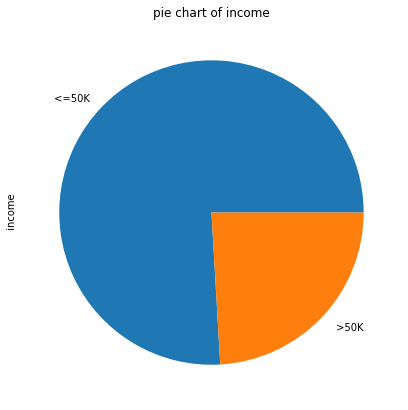

In [7]:
import matplotlib.pyplot as plt
df[' income'].value_counts().plot.pie(figsize=(7,7))
plt.title('pie chart of income')

In [8]:
from evalml import *

In [9]:
X = df.drop(" income", axis=1)

y = df[" income"]
X_train, X_test, y_train, y_test = preprocessing.split_data(X, y, problem_type='binary',test_size=.2)

print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  26048
Size of test data :  6513


In [10]:
type(X_train)

woodwork.datatable.DataTable

In [11]:
from evalml.automl import AutoMLSearch



automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type="binary", objective="F1")

Using default limit of max_batches=1.

Generating pipelines to search over...


In [12]:
automl.search()


*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: decision_tree, catboost, lightgbm, extra_trees, xgboost, linear_model, random_forest



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean F1: 0.000

*****************************
* Evaluating Batch Number 1 *
*****************************



/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created



Decision Tree Classifier w/ Imputer + Text Featurization Component + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean F1: 0.633


/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created



Extra Trees Classifier w/ Imputer + Text Featurization Component + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean F1: 0.654


/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created



CatBoost Classifier w/ Imputer + Text Featurization Component:
	Starting cross validation
	Finished cross validation - mean F1: 0.683


/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created



Random Forest Classifier w/ Imputer + Text Featurization Component + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean F1: 0.690


/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created



LightGBM Classifier w/ Imputer + Text Featurization Component + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean F1: 0.724


/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created



XGBoost Classifier w/ Imputer + Text Featurization Component + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean F1: 0.728


/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created



Elastic Net Classifier w/ Imputer + Text Featurization Component + One Hot Encoder + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean F1: 0.388


/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created



Logistic Regression Classifier w/ Imputer + Text Featurization Component + One Hot Encoder + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean F1: 0.677

Search finished after 22:13            


/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning:

Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created



Best pipeline: XGBoost Classifier w/ Imputer + Text Featurization Component + One Hot Encoder
Best pipeline F1: 0.727805


In [13]:
automl.rankings

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,XGBoost Classifier w/ Imputer + Text Featuriza...,0.727805,0.009281,0.731322,72.780530,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,5,LightGBM Classifier w/ Imputer + Text Featuriz...,0.724157,0.006780,0.723946,72.415695,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,4,Random Forest Classifier w/ Imputer + Text Fea...,0.689527,0.011830,0.698573,68.952711,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,3,CatBoost Classifier w/ Imputer + Text Featuriz...,0.682558,0.005797,0.686113,68.255763,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,8,Logistic Regression Classifier w/ Imputer + Te...,0.677314,0.014673,0.683200,67.731354,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,2,Extra Trees Classifier w/ Imputer + Text Featu...,0.654050,0.010403,0.665759,65.404968,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,1,Decision Tree Classifier w/ Imputer + Text Fea...,0.633105,0.014144,0.644577,63.310504,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,7,Elastic Net Classifier w/ Imputer + Text Featu...,0.388169,0.000021,0.388157,38.816868,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0.000000,0.000000,0.000000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [19]:
best_pipeline=automl.best_pipeline



In [18]:
best_pipeline.score(X_test, y_test, objectives = ["auc","f1"])

OrderedDict([('AUC', 0.9251058196281546), ('F1', 0.7250155183116077)])